<h1 style="text-align:center; font-size:300%; color:#007bff;"><b>Predicting Term Deposit Subscriptions in Banking</b></h1>


<h2 style="font-size:150%;"><b>Importing Libraries:</b></h2>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap

<h2 style="font-size:150%;"><b>Setting options:</b></h2>

In [7]:
pd.options.display.max_columns = None   # displaying all columns
pd.options.display.max_rows = None      # displaying all rows 
np.set_printoptions(suppress=True)      #converting the 'exponential' values to float

<h2 style="font-size:150%;"><b>Reading Data:</b></h2>

In [8]:
df_bank=pd.read_csv(r"C:\Users\sm983\Desktop\Machine Learning Projects\Term_deposit\Assignment-2_Data.csv")
df_bank.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


<h2 style="font-size:150%;"><b>Checking Shape of Data:</b></h2>

In [9]:
df_bank.shape

(45211, 18)

<h2 style="font-size:150%;"><b>Data Overview:</b></h2>

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


<h2 style="font-size:150%;"><b>Checking Data Types of Variables:</b></h2>

In [11]:
df_bank.dtypes

Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

<h2 style="font-size:150%;"><b>Summary Statistics:</b></h2>

<h3 style="font-size:100%;"><b>Summary Statistics for Numeric Variables:</b></h3>

In [12]:
df_bank.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h3 style="font-size:100%;"><b>Summary Statistics for Categorical Variables:</b></h3>

In [13]:
df_bank.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


<h2 style="font-size:150%;"><b>Missing Values Treatment:</b></h2>

<h3 style="font-size:100%;"><b>Checking For Missing Values:</b></h3>

In [14]:
#df_bank.isnull().sum()/
Total = df_bank.isnull().sum().sort_values(ascending = False) 
Percent = (df_bank.isnull().sum()*100/df_bank.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data['Type'] = df_bank[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
age,9,0.019907,float64
balance,3,0.006636,float64
Id,0,0.000000,int64
day,0,0.000000,int64
poutcome,0,0.000000,object
previous,0,0.000000,int64
pdays,0,0.000000,int64
campaign,0,0.000000,int64
duration,0,0.000000,int64
month,0,0.000000,object


<h3 style="font-size:100%;"><b>Filling Missing Values:</b></h3>

In [15]:
df_bank['age']=df_bank['age'].fillna(df_bank['age'].mean())

In [16]:
df_bank['balance']=df_bank['balance'].fillna(df_bank['balance'].median())

<h3 style="font-size:100%;"><b>Reassuring for Missing values :</b></h3>

In [17]:
df_bank.isnull().sum()

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<h2 style="font-size:150%;"><b>Outliers Treatment:</b></h2>

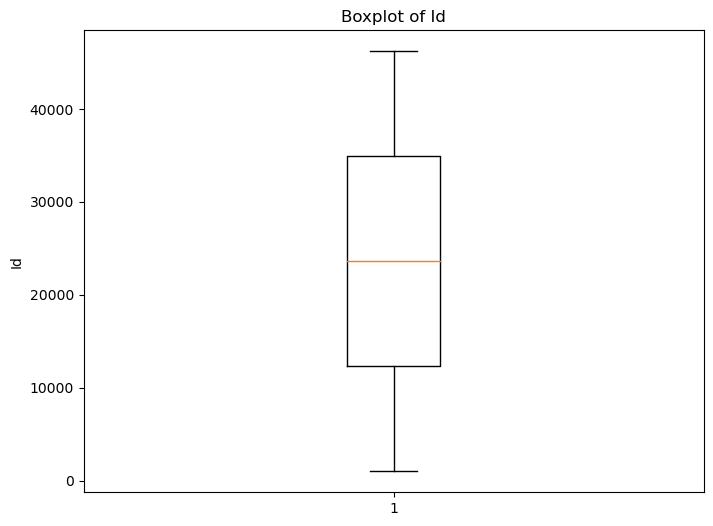

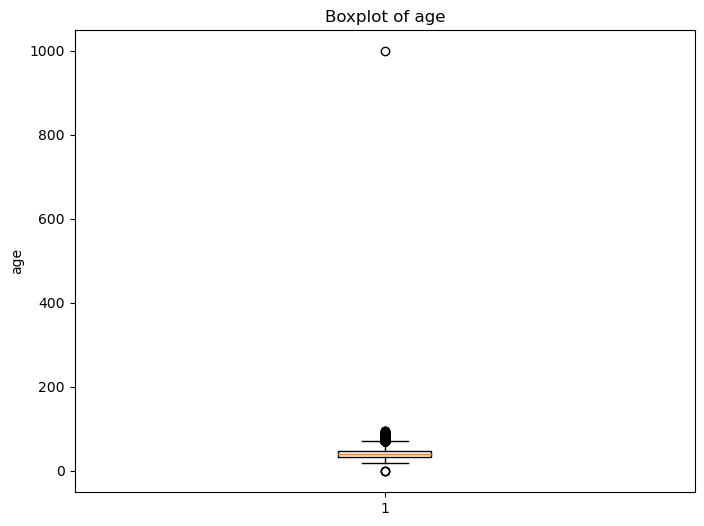

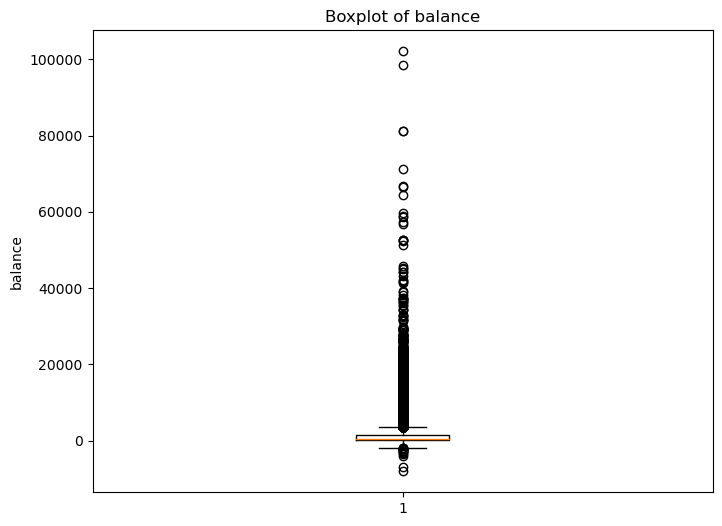

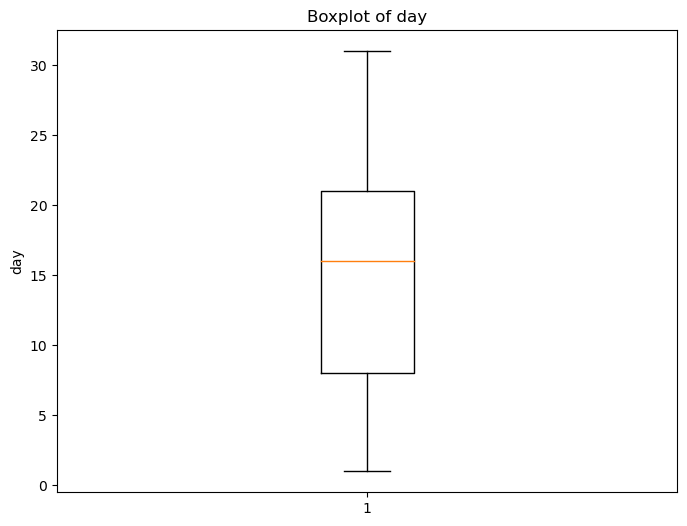

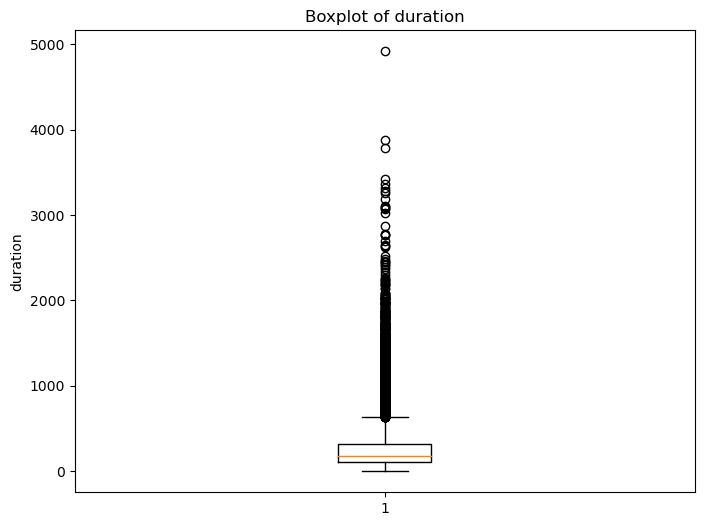

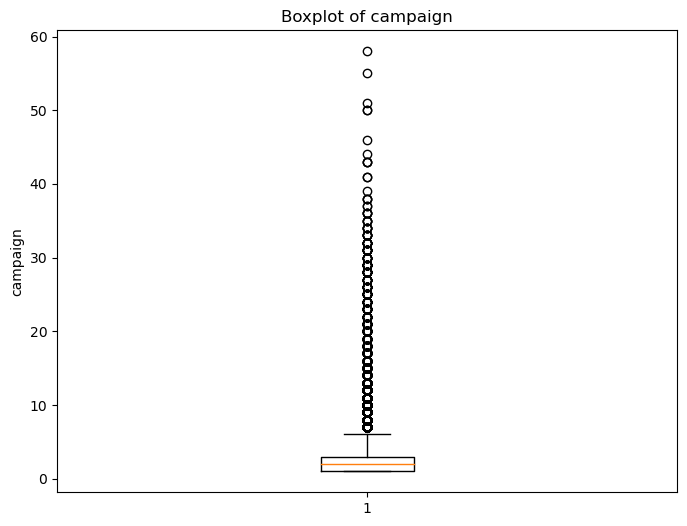

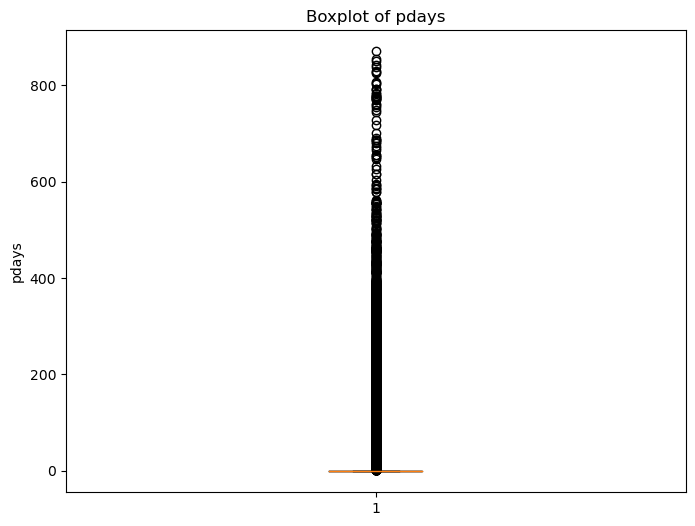

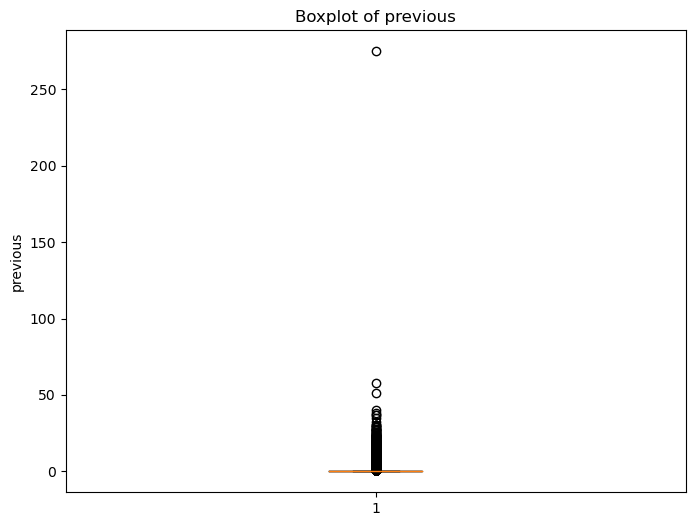

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
# Filter out non-numeric columns
numeric_columns = df_bank.select_dtypes(include=['number']).columns
# boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bank[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()
    
    # Calculating IQR and filter outliers
    Q1 = df_bank[column].quantile(0.20)
    Q3 = df_bank[column].quantile(0.90)
    IQR = Q3 - Q1

    # Filtering the DataFrame based on the IQR
    df_bank = df_bank[(df_bank[column] >= Q1 - 1.5 * IQR) & (df_bank[column] <= Q3 + 1.5 * IQR)].reset_index(drop=True)


<h2 style="font-size:150%;"><b>Categorical Columns Analysis:</b></h2>

In [19]:
cat_cols = [col for col in df_bank.columns if df_bank[col].dtype == 'object']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

<h2 style="font-size:150%;"><b>Numerical Columns Analysis:</b></h2>

In [20]:
num_cols = df_bank.select_dtypes(include=['int', 'float']).columns.tolist()
num_cols

['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

<h2 style="font-size:150%;"><b>Exploratory Data Analysis:</b></h2>

<h3 style="font-size:100%;"><b>Distribution of Job with respective to Churn :</b></h3>

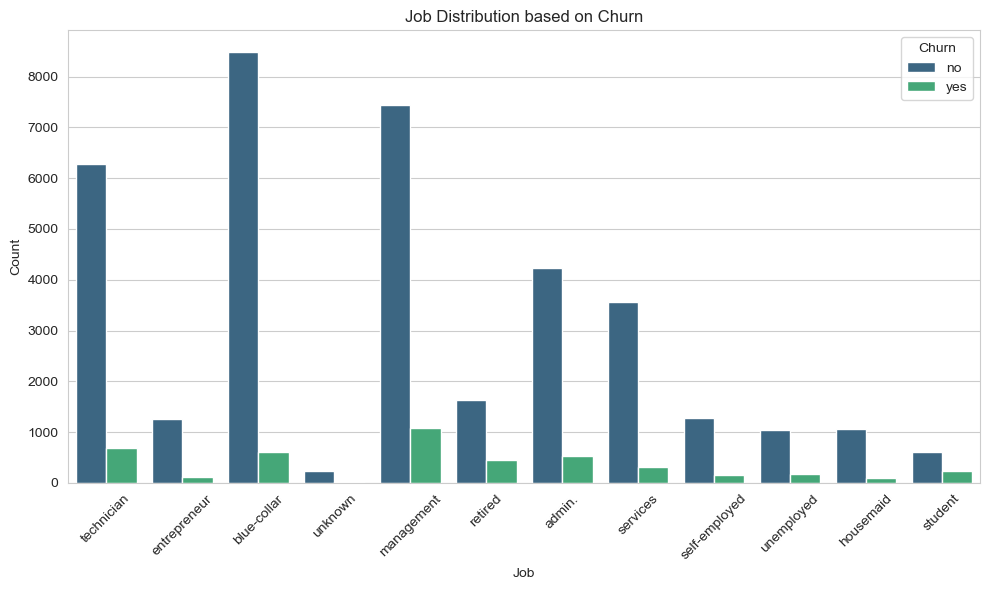

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")   # Setting  style
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=df_bank, palette='viridis')
plt.title('Job Distribution based on Churn')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

<h3 style="font-size:100%;"><b>Loan Status Distribution by Default Status :</b></h3>

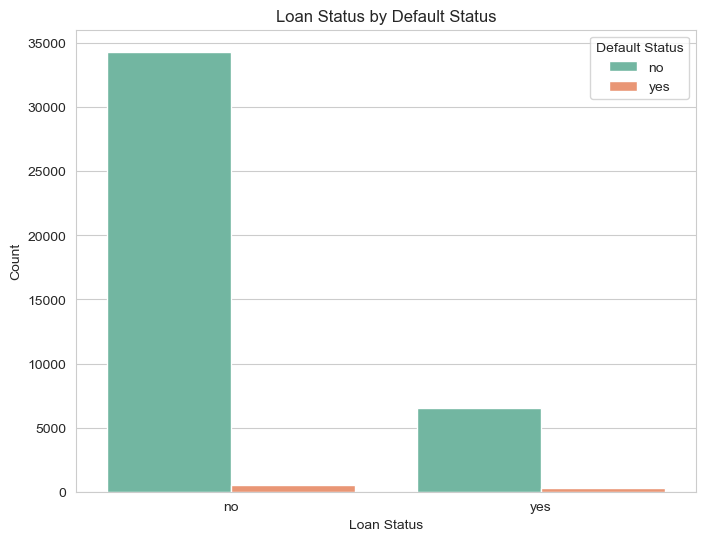

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan', hue='default', data=df_bank, palette='Set2')
plt.title('Loan Status by Default Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()

<h3 style="font-size:100%;"><b>Visualizing the Average Account Balance across different Job categories.:</b></h3>

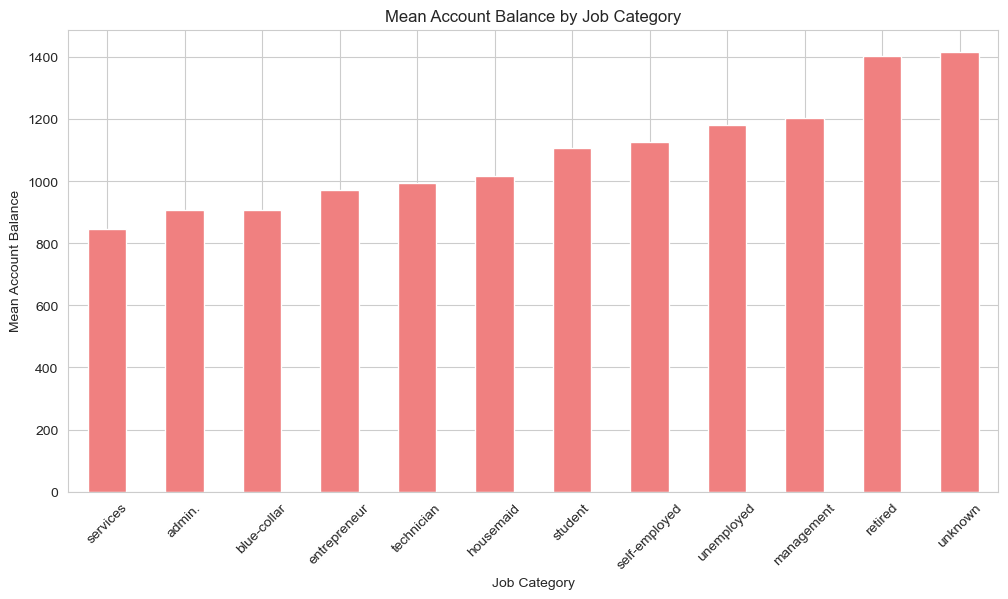

In [23]:
# Calculating mean account balance by job category
mean_balance_job = df_bank.groupby('job')['balance'].mean().sort_values()
# Plotting bar plot
plt.figure(figsize=(12, 6))  
mean_balance_job.plot(kind='bar', color='lightcoral')
plt.title('Mean Account Balance by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Mean Account Balance')
plt.xticks(rotation=45)
plt.show()

<h3 style="font-size:100%;"><b>Comparison of Age Distribution between Two Groups:</b></h3>

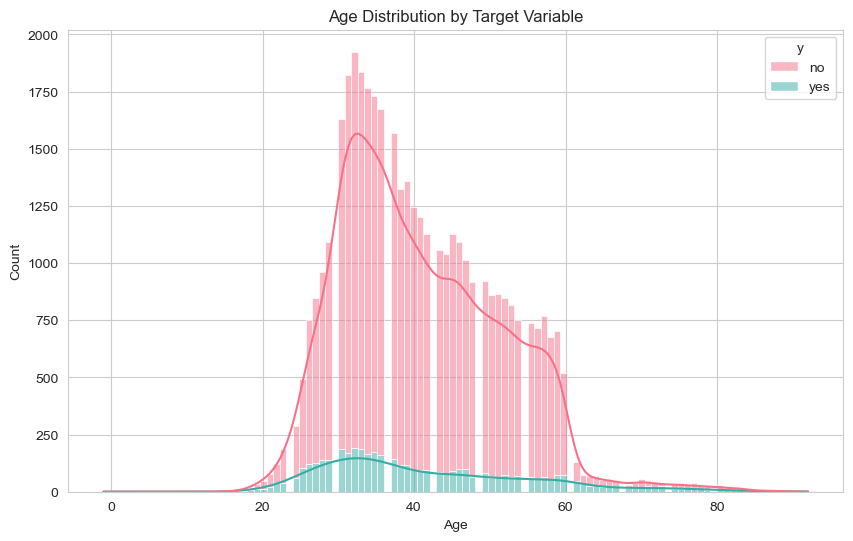

In [24]:
# showing how many people of different ages are in each group of target variable(yes/no):
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 6))
sns.histplot(df_bank, x='age', hue='y', kde=True, palette='husl', multiple='stack')
plt.title('Age Distribution by Target Variable')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<h3 style="font-size:100%;"><b>Marital Status Distribution by Target Variable:</b></h3>

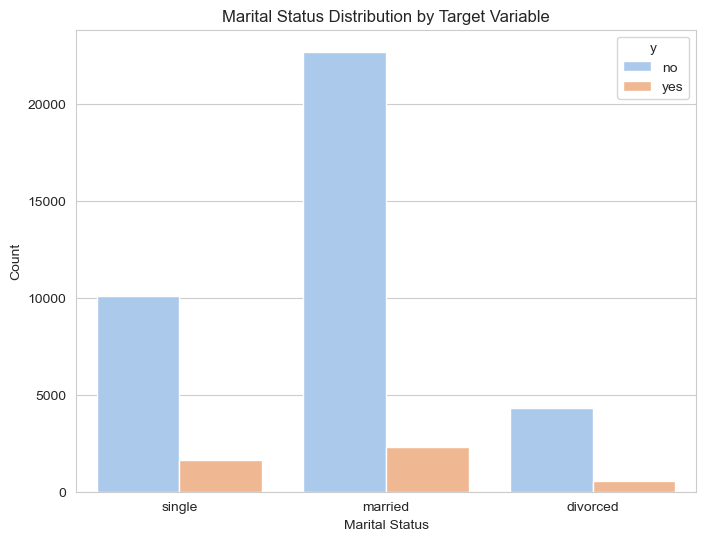

In [25]:
# Plot for Marital Status Distribution by Target Variable 'y':
plt.figure(figsize=(8, 6))
sns.countplot(data=df_bank, x='marital', hue='y', palette='pastel')
plt.title('Marital Status Distribution by Target Variable')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

<h3 style="font-size:100%;"><b>Countplot Visualization of Categorical Variables with respective Subscription of Term Deposit:</b></h3>

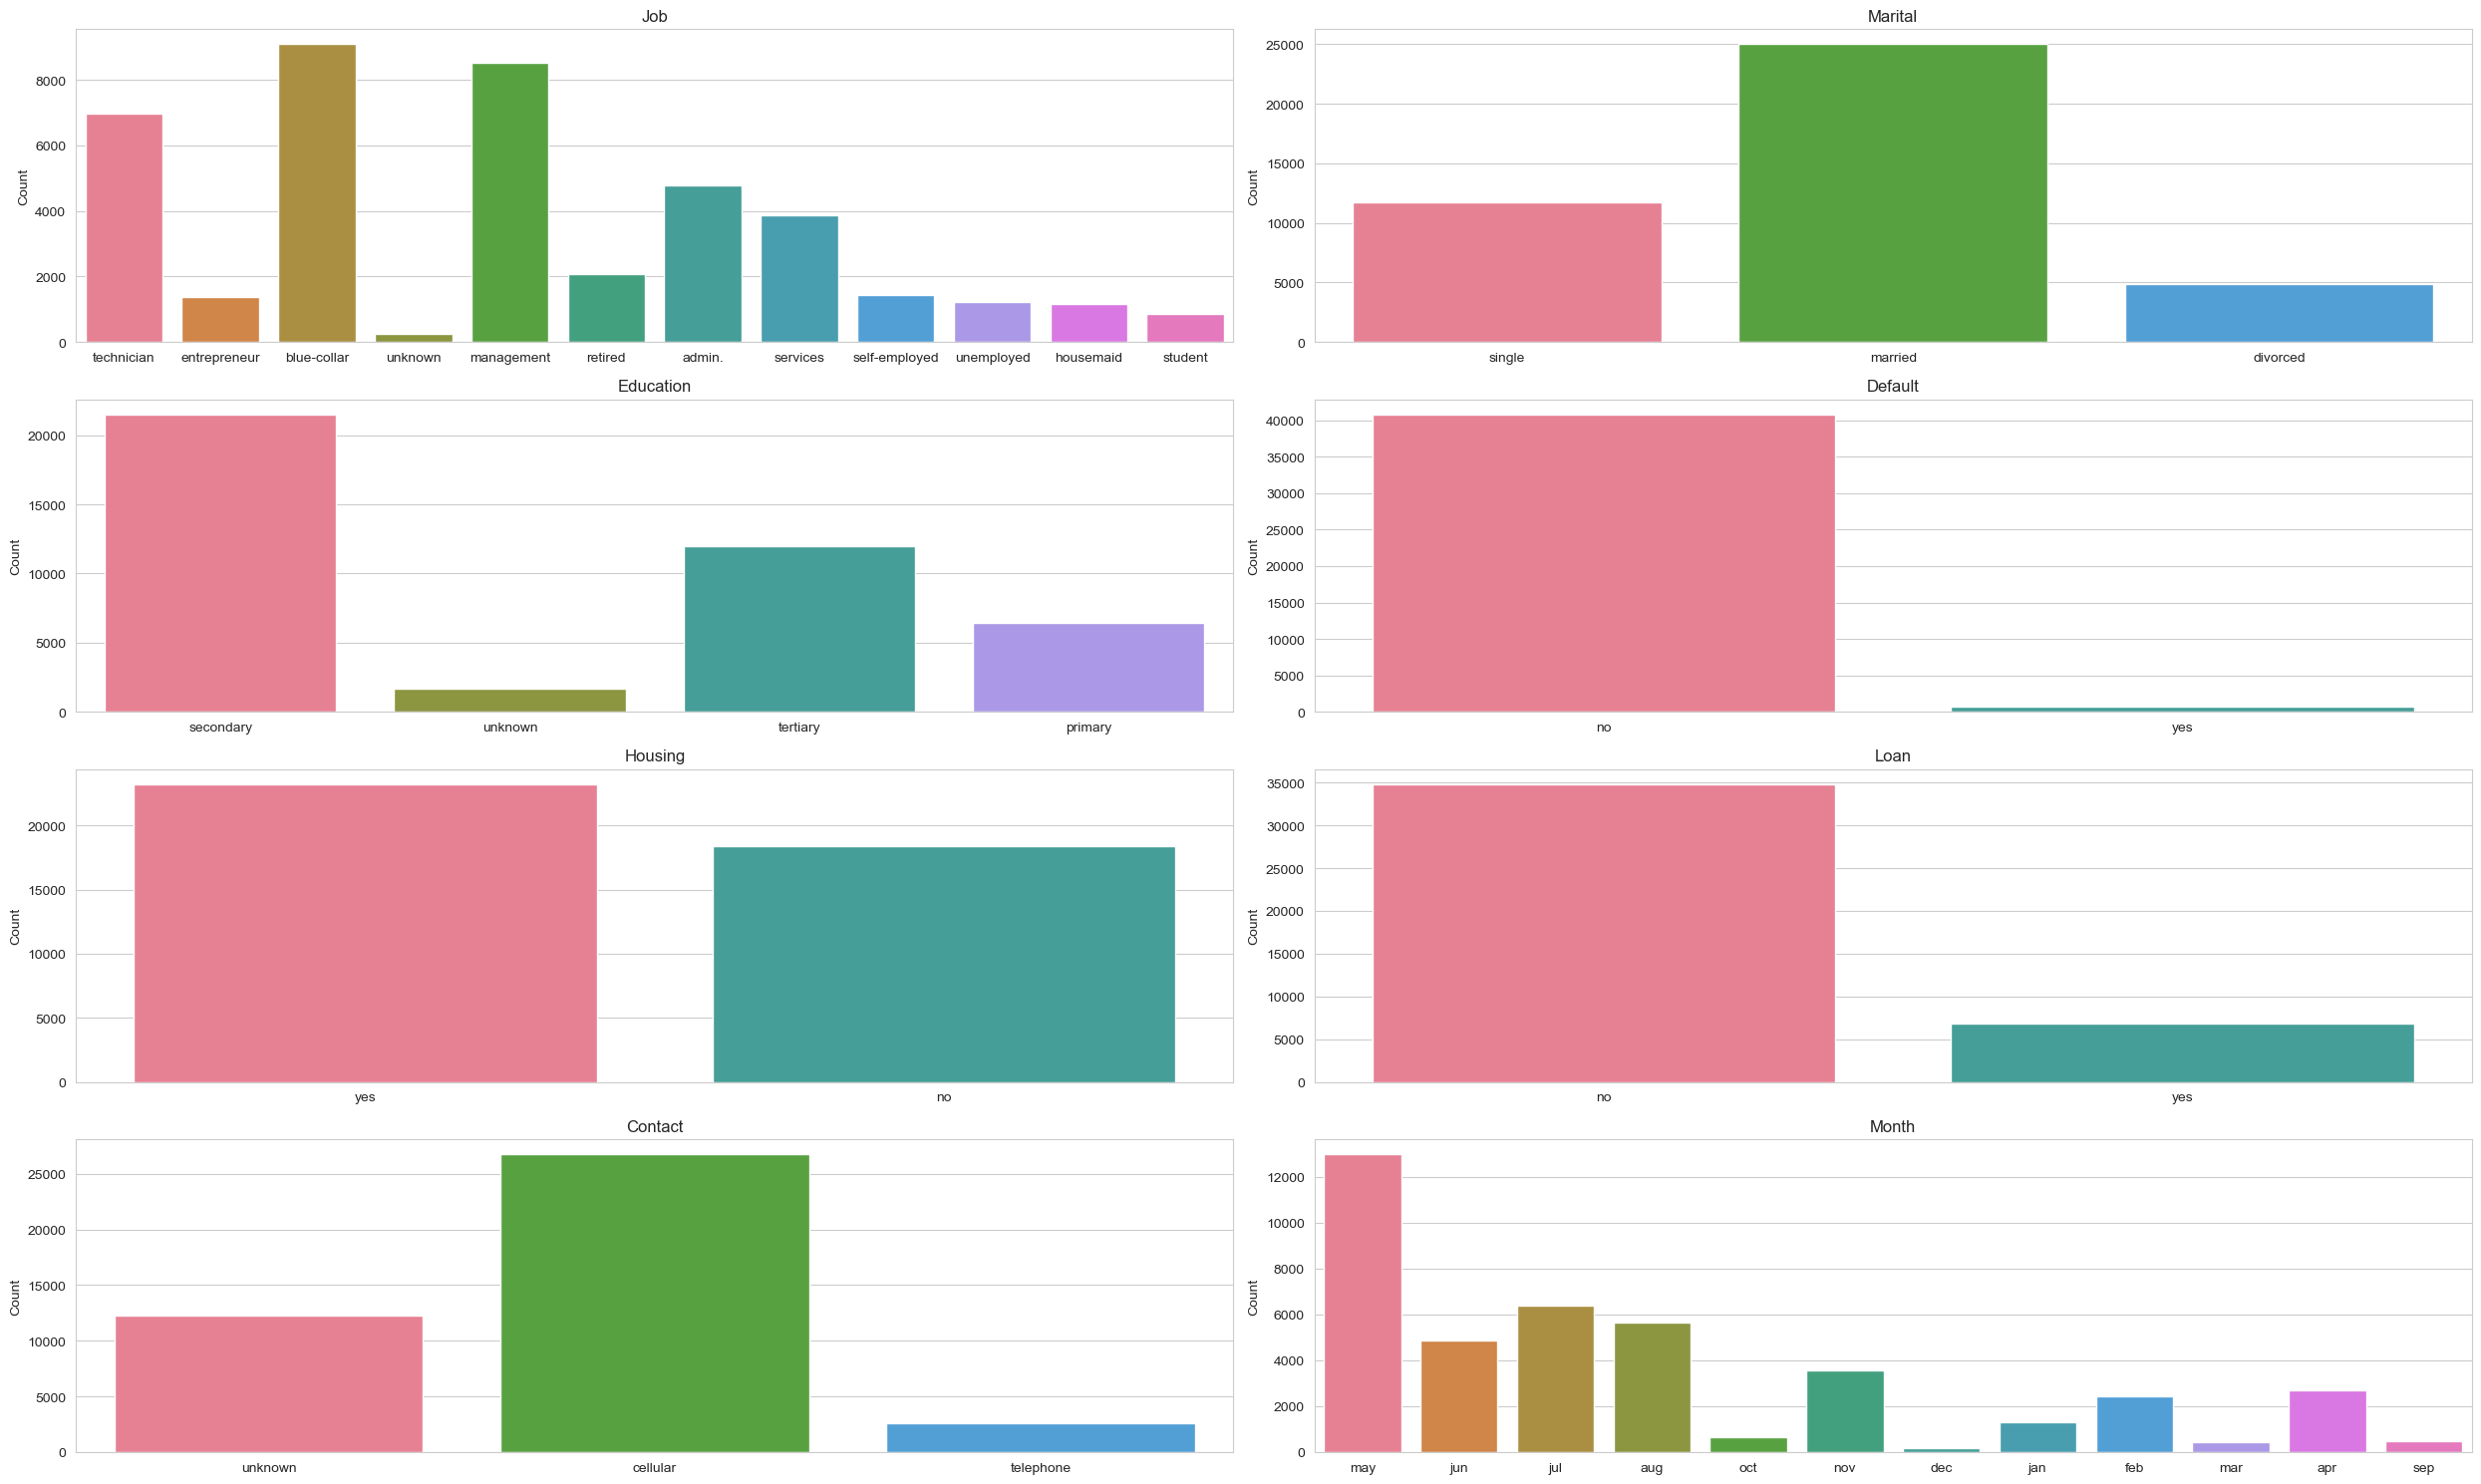

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the list of categorical variables
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Creating subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(25, 15))

# Looping through each categorical variable and plotting countplot
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df_bank[variable], ax=subplot, palette='husl')  
    subplot.set_title(variable.capitalize())  # Capitalize the variable name
    subplot.set_xlabel("")  # Removing x-axis label
    subplot.set_ylabel("Count")  # Setting y-axis label
plt.tight_layout()
plt.show()

<h3 style="font-size:100%;"><b>Visualizing Term Deposit Churn Status:</b></h3>

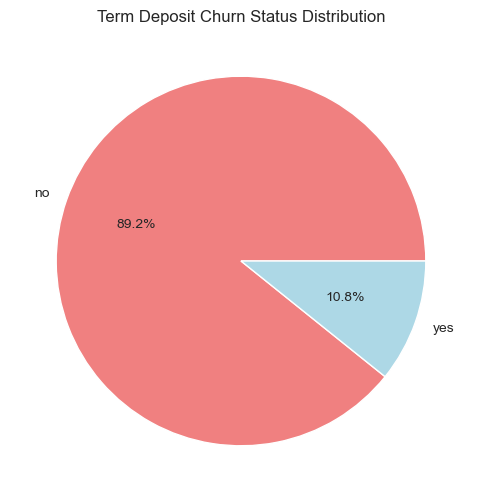

In [27]:
import matplotlib.pyplot as plt
y_counts = df_bank['y'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Term Deposit Churn Status Distribution')
plt.show()

<h2 style="font-size:150%;"><b>Data Preparation:</b></h2>

<h2 style="font-size:100%;"><b>Analysing Unique values of Each Varible:</b></h2>

In [28]:
for col in df_bank.columns:
    print(col,' ',df_bank[col].nunique())

Id   41594
age   76
job   12
marital   3
education   4
default   2
balance   6257
housing   2
loan   2
contact   3
day   31
month   12
duration   1200
campaign   11
pdays   444
previous   6
poutcome   4
y   2


<h3 style="font-size:100%;"><b>Converting month names to their corresponding numerical representations:</b></h3>

In [29]:
# Defining the custom mapping dictionary for months
month_mapping = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Creating a new column 'month_code' by mapping the 'month' column
df_bank['month_code'] = df_bank['month'].map(month_mapping)


In [30]:
df_bank.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,month_code
0,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,5
1,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,5
2,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,5
3,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,5
4,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no,5


In [31]:
df_bank.drop(columns=['month'],inplace=True)

<h3 style="font-size:100%;"><b>Exploring Unique Value Counts in Categorical Columns :</b></h3>

In [32]:
import pandas as pd
# Selecting only the categorical columns
categorical_columns = df_bank.select_dtypes(include=['object'])
# Looping through each categorical column and printing unique value counts
for column in categorical_columns:
    print(f"Unique value counts for column '{column}':")
    print(df_bank[column].value_counts())
    print()

Unique value counts for column 'job':
job
blue-collar      9094
management       8510
technician       6965
admin.           4773
services         3879
retired          2088
self-employed    1427
entrepreneur     1376
unemployed       1207
housemaid        1156
student           858
unknown           261
Name: count, dtype: int64

Unique value counts for column 'marital':
marital
married     25010
single      11731
divorced     4853
Name: count, dtype: int64

Unique value counts for column 'education':
education
secondary    21513
tertiary     11979
primary       6404
unknown       1698
Name: count, dtype: int64

Unique value counts for column 'default':
default
no     40825
yes      769
Name: count, dtype: int64

Unique value counts for column 'housing':
housing
yes    23223
no     18371
Name: count, dtype: int64

Unique value counts for column 'loan':
loan
no     34816
yes     6778
Name: count, dtype: int64

Unique value counts for column 'contact':
contact
cellular     26761
unknown

In [33]:
categorical_columns.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')

<h3 style="font-size:150%;"><b>Dummy Encoding :</b></h3>

In [34]:
var_dum = pd.get_dummies(df_bank[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y']], drop_first=True, dtype=int)
df_bank = pd.concat([df_bank, var_dum], axis=1)

In [35]:
df_bank.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,151,1,-1,0,unknown,no,5,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,76,1,-1,0,unknown,no,5,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,92,1,-1,0,unknown,no,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
3,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,198,1,-1,0,unknown,no,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,139,1,-1,0,unknown,no,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


<h3 style="font-size:100%;"><b>Dropping Original Categorical Columns Post Dummy Encoding:</b></h3>

In [36]:
df_bank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'], axis=1, inplace=True)
df_bank.head()

,Id,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,1002,44.0,29.0,5,151,1,-1,0,5,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,1003,33.0,2.0,5,76,1,-1,0,5,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,1004,47.0,1506.0,5,92,1,-1,0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
3,1005,33.0,1.0,5,198,1,-1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,1006,35.0,231.0,5,139,1,-1,0,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


<h3 style="font-size:100%;"><b>Final check for Variables Datatype Before Model Building:</b></h3>

In [37]:
df_bank.dtypes

Id                       int64
age                    float64
balance                float64
day                      int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
month_code               int64
job_blue-collar          int32
job_entrepreneur         int32
job_housemaid            int32
job_management           int32
job_retired              int32
job_self-employed        int32
job_services             int32
job_student              int32
job_technician           int32
job_unemployed           int32
job_unknown              int32
marital_married          int32
marital_single           int32
education_secondary      int32
education_tertiary       int32
education_unknown        int32
default_yes              int32
housing_yes              int32
loan_yes                 int32
contact_telephone        int32
contact_unknown          int32
poutcome_other           int32
poutcome_success         int32
poutcome

<h3 style="font-size:150%;"><b>Correlation Analysis :</b></h3>

<h3 style="font-size:100%;"><b>Correlation Matrix Using corr():</b></h3>

In [38]:
df_bank.corr()

,Id,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
Id,1.000000,0.006307,0.094977,-0.055679,0.014991,-0.090750,0.416679,0.407008,0.014716,-0.118086,-0.020897,-0.011820,0.054916,0.084108,0.008210,-0.040753,0.122470,-0.008051,0.030207,-0.003983,-0.073225,0.095510,-0.047020,0.108506,-0.006742,-0.052946,-0.178280,-0.082106,0.128167,-0.756628,0.189005,0.251138,-0.468787,0.295690
age,0.006307,1.000000,0.104671,-0.007897,-0.012374,0.032332,-0.025666,0.002969,0.094597,-0.043193,0.019886,0.089710,-0.025076,0.444817,-0.008227,-0.064797,-0.198286,-0.066938,0.001588,0.051912,0.282807,-0.428233,-0.097325,-0.081240,0.069452,-0.016831,-0.183422,-0.011238,0.163671,-0.016346,-0.025737,0.031294,0.003604,0.022174
balance,0.094977,0.104671,1.000000,0.012604,0.036424,-0.016980,0.014117,0.043066,0.096576,-0.040733,-0.006682,-0.001297,0.055743,0.054209,0.011511,-0.036793,0.007137,-0.010490,0.016465,0.019370,0.029467,-0.012962,-0.065856,0.067984,0.013270,-0.101741,-0.064946,-0.099122,0.043064,-0.041419,0.005168,0.047538,-0.050193,0.075121
day,-0.055679,-0.007897,0.012604,1.000000,-0.024848,0.131311,-0.090426,-0.067886,0.096301,-0.022311,-0.000790,0.002907,0.018645,-0.008122,0.003609,-0.007749,-0.015662,0.031484,-0.007058,-0.012048,0.004554,-0.006022,-0.006130,0.021934,-0.000140,0.007510,-0.023941,0.009766,0.021910,-0.029129,-0.029176,-0.025181,0.077540,-0.025478
duration,0.014991,-0.012374,0.036424,-0.024848,1.000000,-0.068584,0.003567,0.010955,-0.015629,0.019012,0.000679,-0.007818,-0.011309,0.027571,0.001796,-0.002291,-0.005744,-0.010129,0.014792,-0.005481,-0.021259,0.019944,0.006207,-0.004766,0.001956,-0.003744,0.007539,-0.012941,-0.040726,-0.017005,0.005267,0.051377,-0.008041,0.389163
campaign,-0.090750,0.032332,-0.016980,0.131311,-0.068584,1.000000,-0.086760,-0.073798,0.055571,0.002674,0.012199,0.013179,0.022875,-0.021965,0.006572,-0.006465,-0.023362,0.016744,-0.016674,0.011633,0.044375,-0.040678,-0.021829,0.013233,-0.005190,0.015359,-0.040999,0.002235,0.064544,-0.014520,-0.009313,-0.064061,0.109444,-0.075094
pdays,0.416679,-0.025666,0.014117,-0.090426,0.003567,-0.086760,1.000000,0.736208,-0.119635,0.024152,-0.012618,-0.028871,-0.015745,-0.004369,-0.009908,0.007658,0.026322,-0.013658,-0.011692,-0.016088,-0.025243,0.025421,0.022149,-0.011948,-0.005234,-0.031195,0.128242,-0.020664,0.011887,-0.251409,0.382362,0.240394,-0.889539,0.091578
previous,0.407008,0.002969,0.043066,-0.067886,0.010955,-0.073798,0.736208,1.000000,-0.044991,-0.017318,-0.011084,-0.018566,0.012922,0.016907,0.000740,-0.009787,0.034198,-0.006585,-0.011047,-0.008953,-0.017788,0.018237,-0.002671,0.028779,-0.008642,-0.036415,0.049503,-0.023364,0.015556,-0.240482,0.366304,0.352336,-0.850270,0.146658
month_code,0.014716,0.094597,0.096576,0.096301,-0.015629,0.055571,-0.119635,-0.044991,1.000000,-0.084861,0.027736,0.033188,0.078116,0.024817,0.026777,-0.041520,-0.019553,0.039065,-0.039757,0.008817,0.064711,-0.072280,-0.049884,0.080157,-0.017422,0.015918,-0.173640,0.028950,0.040013,-0.182067,-0.063567,0.033461,0.063385,0.019067
job_blue-collar,-0.118086,-0.043193,-0.040733,-0.022311,0.019012,0.002674,0.024152,-0.017318,-0.084861,1.000000,-0.097844,-0.089438,-0.268282,-0.121610,-0.099704,-0.169644,-0.076770,-0.237234,-0.091447,-0.042035,0.124843,-0.089946,0.036953,-0.318828,0.014037,0.009874,0.177294,0.014344,-0.002362,0.135635,0.002590,-0.047809,0.015938,-0.069448


<h3 style="font-size:100%;"><b>Correlation Visualization with Heatmap:</b></h3>

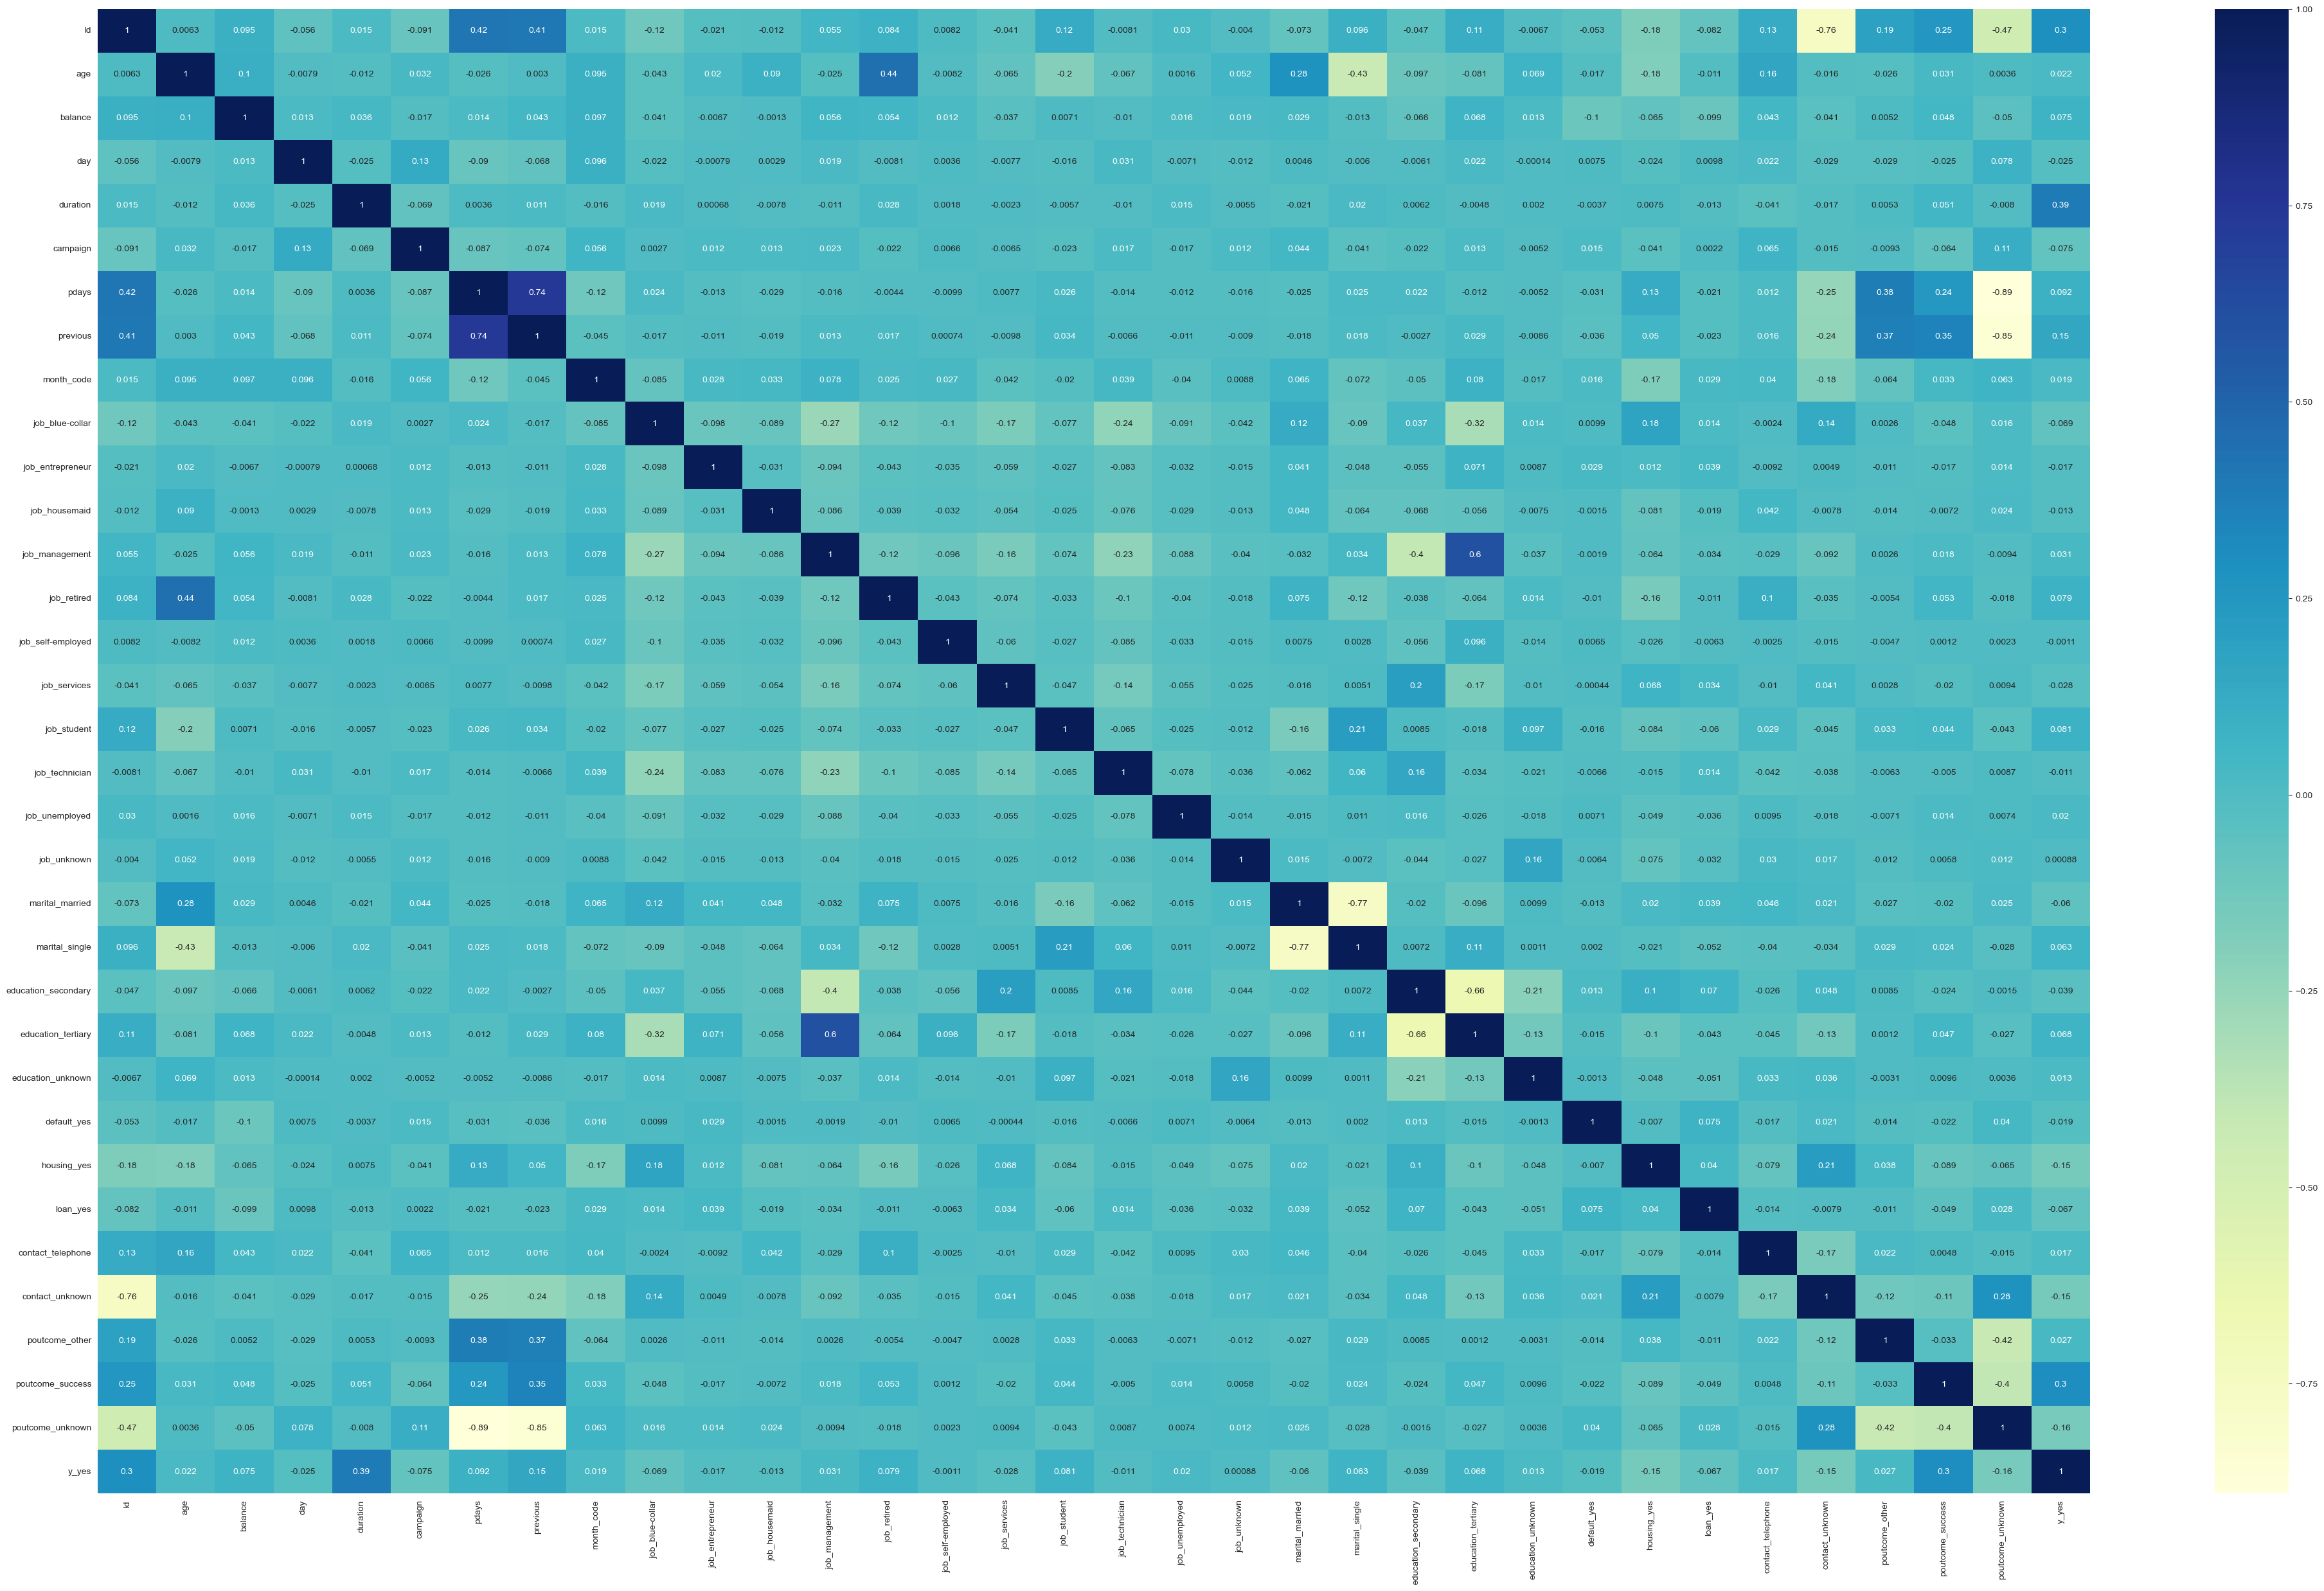

In [39]:
plt.figure(figsize=(50,30))
sns.heatmap(df_bank.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [40]:
df_bank.columns

Index(['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'month_code', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_yes'],
      dtype='object')

In [41]:
df_bank.drop(columns=['Id'],inplace=True)

<h3 style="font-size:100%;"><b>Verifying DataFrame Shape After Data Preprocessing:</b></h3>

In [42]:
df_bank.shape

(41594, 33)

In [43]:
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,44.0,29.0,5,151,1,-1,0,5,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,33.0,2.0,5,76,1,-1,0,5,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,47.0,1506.0,5,92,1,-1,0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
3,33.0,1.0,5,198,1,-1,0,5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,35.0,231.0,5,139,1,-1,0,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


<h3 style="font-size:150%;"><b>Feature Scaling :</b></h3>

<h2 style="font-size:100%;"><b>Scaling Numerical Features with Min-Max Scaler:</b></h2>

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Scaling the numerical features
df_bank[['age', 'balance', 'day', 'duration', 'campaign','month_code','pdays','previous']] = scaler.fit_transform(df_bank[['age', 'balance', 'day', 'duration', 'campaign','month_code','pdays','previous']])


In [45]:
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0.483871,0.315278,0.133333,0.122665,0.0,0.0,0.0,0.363636,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,0.365591,0.313194,0.133333,0.061738,0.0,0.0,0.0,0.363636,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,0.516129,0.429244,0.133333,0.074736,0.0,0.0,0.0,0.363636,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
3,0.365591,0.313117,0.133333,0.160845,0.0,0.0,0.0,0.363636,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,0.387097,0.330864,0.133333,0.112916,0.0,0.0,0.0,0.363636,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


<h3 style="font-size:150%;"><b>Splitting Data into Training and Testing Sets:</b></h3>

In [46]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df_bank,train_size=0.7,test_size=0.3,random_state=100)

<h2 style="font-size:100%;"><b>Training data Size :</b></h2>

In [51]:
df_train.shape

(29115, 32)

<h2 style="font-size:100%;"><b>Test data Size :</b></h2>

In [52]:
df_test.shape

(12479, 33)

<h2 style="font-size:100%;"><b>Previewing of Training Data:</b></h2>

In [47]:
df_train.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
40233,0.387097,0.350386,0.366667,0.116166,0.1,0.397872,0.2,0.272727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
27901,0.311828,0.348380,0.100000,0.090983,0.3,0.429787,0.6,0.090909,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9283,0.440860,0.365201,0.266667,0.060114,0.0,0.000000,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
29897,0.344086,0.346219,0.466667,0.083672,0.1,0.000000,0.0,0.272727,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
17762,0.333333,0.442130,0.100000,0.162470,0.0,0.000000,0.0,0.636364,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


<h2 style="font-size:100%;"><b>Separating Target Variable from Training Data:</b></h2>

In [48]:
y_train=df_train.pop('y_yes')
x_train=df_train

<h2 style="font-size:100%;"><b>Previewing Features of Training Data without Target Variable:</b></h2>

In [49]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
40233,0.387097,0.350386,0.366667,0.116166,0.1,0.397872,0.2,0.272727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
27901,0.311828,0.348380,0.100000,0.090983,0.3,0.429787,0.6,0.090909,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9283,0.440860,0.365201,0.266667,0.060114,0.0,0.000000,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
29897,0.344086,0.346219,0.466667,0.083672,0.1,0.000000,0.0,0.272727,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
17762,0.333333,0.442130,0.100000,0.162470,0.0,0.000000,0.0,0.636364,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


<h2 style="font-size:100%;"><b>Previewing Features of Training Data with only Target Variable:</b></h2>

In [41]:
y_train.head()

40233    0
27901    0
9283     0
29897    0
17762    0
Name: y_yes, dtype: int32

<h3 style="font-size:150%;"><b>Constructing Logistic Regression Model:</b></h3>

<h2 style="font-size:100%;"><b>Adding Intercept to Training Features for Logistic Regression:</b></h2>

In [42]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels
x_train=sm.add_constant(x_train)
x_train.head()

,const,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
40233,1.0,0.387097,0.350386,0.366667,0.116166,0.1,0.397872,0.2,0.272727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
27901,1.0,0.311828,0.348380,0.100000,0.090983,0.3,0.429787,0.6,0.090909,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9283,1.0,0.440860,0.365201,0.266667,0.060114,0.0,0.000000,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
29897,1.0,0.344086,0.346219,0.466667,0.083672,0.1,0.000000,0.0,0.272727,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1
17762,1.0,0.333333,0.442130,0.100000,0.162470,0.0,0.000000,0.0,0.636364,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


<h2 style="font-size:100%;"><b>Fitting Logistic Regression Model and Summarizing Results:</b></h2>

In [43]:
from sklearn.linear_model import LogisticRegression
logistic=sm.Logit(y_train,x_train).fit()
print(logistic.summary())

Optimization terminated successfully.
         Current function value: 0.230315
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                29115
Model:                          Logit   Df Residuals:                    29082
Method:                           MLE   Df Model:                           32
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.3283
Time:                        15:33:31   Log-Likelihood:                -6705.6
converged:                       True   LL-Null:                       -9982.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.3043      0.254    -12.992      0.000      -3.803      -2.806
ag

<h2 style="font-size:100%;"><b>Previewing of Test Data:</b></h2>

In [44]:
df_test.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
16902,0.569892,0.421065,0.966667,0.083672,0.3,0.0,0.0,0.545455,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
25367,0.354839,0.420833,0.666667,0.181966,0.2,0.0,0.0,0.909091,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
5945,0.354839,0.277701,0.866667,0.116166,0.0,0.0,0.0,0.363636,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
10020,0.408602,0.399460,0.500000,0.151909,0.2,0.0,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
10191,0.419355,0.862731,0.500000,0.244517,0.5,0.0,0.0,0.454545,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0


<h2 style="font-size:100%;"><b>Separating Target Variable from Test Data:</b></h2>

In [45]:
y_test=df_test.pop('y_yes')
x_test=df_test

<h2 style="font-size:100%;"><b>Previewing Features of Test Data without Target Variable:</b></h2>

In [46]:
x_test.head()

,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
16902,0.569892,0.421065,0.966667,0.083672,0.3,0.0,0.0,0.545455,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
25367,0.354839,0.420833,0.666667,0.181966,0.2,0.0,0.0,0.909091,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
5945,0.354839,0.277701,0.866667,0.116166,0.0,0.0,0.0,0.363636,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
10020,0.408602,0.399460,0.500000,0.151909,0.2,0.0,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
10191,0.419355,0.862731,0.500000,0.244517,0.5,0.0,0.0,0.454545,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


<h2 style="font-size:100%;"><b>Previewing Features of Test Data only with Target Variable:</b></h2>

In [47]:
y_test.head()

16902    0
25367    0
5945     0
10020    0
10191    0
Name: y_yes, dtype: int32

<h2 style="font-size:100%;"><b>Adding Intercept to Test Features for Logistic Regression:</b></h2>

In [48]:
x_test=sm.add_constant(x_test)
x_test.head()

,const,age,balance,day,duration,campaign,pdays,previous,month_code,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
16902,1.0,0.569892,0.421065,0.966667,0.083672,0.3,0.0,0.0,0.545455,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
25367,1.0,0.354839,0.420833,0.666667,0.181966,0.2,0.0,0.0,0.909091,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
5945,1.0,0.354839,0.277701,0.866667,0.116166,0.0,0.0,0.0,0.363636,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
10020,1.0,0.408602,0.399460,0.500000,0.151909,0.2,0.0,0.0,0.454545,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
10191,1.0,0.419355,0.862731,0.500000,0.244517,0.5,0.0,0.0,0.454545,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


<h2 style="font-size:100%;"><b>Predicted Probabilities using Logistic Regression Model:</b></h2>

In [49]:
y_pred_pro=logistic.predict(x_test)
y_pred_pro.head()

16902    0.035564
25367    0.028093
5945     0.023271
10020    0.024204
10191    0.046171
dtype: float64

<h2 style="font-size:100%;"><b>Predicting Binary Classes based on Threshold:</b></h2>

In [50]:
y_pred=['0' if x < 0.5 else '1' for x in y_pred_pro]

<h2 style="font-size:100%;"><b>Converting Predicted Binary classes to Float32 and Displaying First 5 Elements:</b></h2>

In [51]:
y_pred=np.array(y_pred,dtype=np.float32)
y_pred[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)

<h3 style="font-size:150%;"><b>Utilizing Scikit-Learn for Classification Performance Metrics:</b></h3>

<h2 style="font-size:100%;"><b>Importing Libraries for Classification Performance Metrics:</b></h2>

In [52]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier

<h2 style="font-size:120%;"><b>Developing User-Defined Functions for Classification Performance Metrics Retrieval:</b></h2>

<h2 style="font-size:100%;"><b>User-Defined Function to generate a classification report:</b></h2>

In [53]:
def get_test_report(model):
    return(classification_report(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Kappa Value:</b></h2>

In [54]:
def kappa_score(model):
    return(cohen_kappa_score(y_test, y_pred))

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Confusion Matrix:</b></h2>

In [55]:
def plot_confusion_matrix(model):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20) 
    plt.show()

<h2 style="font-size:100%;"><b>User-Defined Function to generate a Roc_Curve:</b></h2>

In [56]:
def plot_roc(model):
    fpr, tpr, _  = roc_curve(y_test, y_pred_pro)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for term_churn Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_pro),4)))
    plt.grid(True)

<h2 style="font-size:100%;"><b>user-defined function to generate an updated scorecard of all metrics:</b></h2>

In [57]:
score_card=pd.DataFrame(columns=['Model','Auc Score','Precision Score','Recall Score','Accuracy Score',
                                 'Kappa Score','f1-score'])
def update_score_card(model_name):
    global score_card
    score_card=score_card._append({'Model':model_name,
                                  'Auc Score':roc_auc_score(y_test,y_pred_pro),
                                  'Precision Score':metrics.precision_score(y_test,y_pred),
                                  'Recall Score':metrics.recall_score(y_test,y_pred),
                                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred),
                                  'Kappa Score':cohen_kappa_score(y_test,y_pred),
                                  'f1-score':metrics.f1_score(y_test,y_pred)},ignore_index=True)
    return(score_card)

<h2 style="font-size:100%;"><b>Confusion Matrix for Logistic Regression:</b></h2>

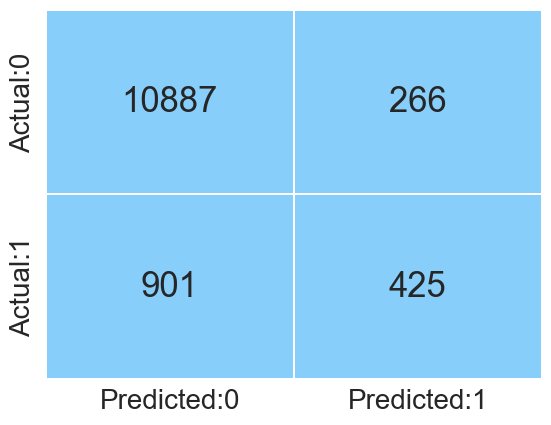

In [58]:
plot_confusion_matrix(logistic)

<h2 style="font-size:100%;"><b>Displaying Test Report for Logistic Regression Model:</b></h2>

In [59]:
test_report=get_test_report(logistic)

In [60]:
print(test_report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11153
           1       0.62      0.32      0.42      1326

    accuracy                           0.91     12479
   macro avg       0.77      0.65      0.69     12479
weighted avg       0.89      0.91      0.89     12479



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Logistic Regression:</b></h2>

In [61]:
kappa_value=kappa_score(logistic)
print(kappa_value)

0.37598612814310783


<h2 style="font-size:100%;"><b>ROC Curve for Logistic Regression Model:</b></h2>

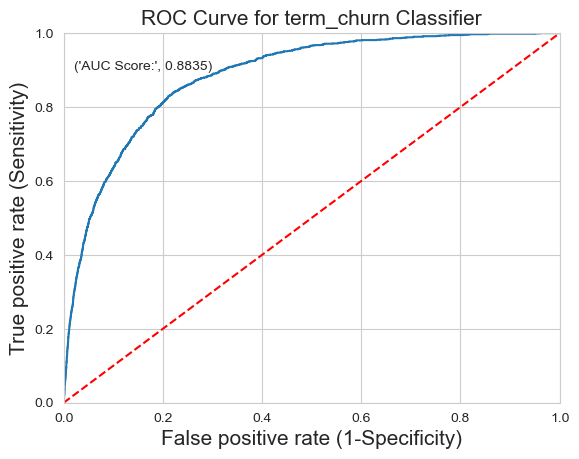

In [62]:
plot_roc(logistic)

<h2 style="font-size:100%;"><b>Generating Updated Score Card for Logistic Regression Model:</b></h2>

In [63]:
update_score_card(model_name='Logistic Regression')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418


<h3 style="font-size:150%;"><b>Training Logistic Regression with Stochastic Gradient Descent(Logistic_with_SGD):</b></h3>

In [64]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(loss='log_loss',random_state=10)
log_with_SGD=SGD.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Logistic Regression with SGD:</b></h2>

In [65]:
y_pred_pro=log_with_SGD.predict_proba(x_test)[:,1]
y_pred_pro

array([0.04958217, 0.04473305, 0.03541883, ..., 0.03176109, 0.03128669,
       0.23580977])

<h2 style="font-size:100%;"><b>Predictions using Logistic Regression with SGD:</b></h2>

In [66]:
y_pred=log_with_SGD.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<h2 style="font-size:150%;"><b>Performance Metrics for SGD Logistic Regression:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for SGD Logistic Regression:</b></h2>

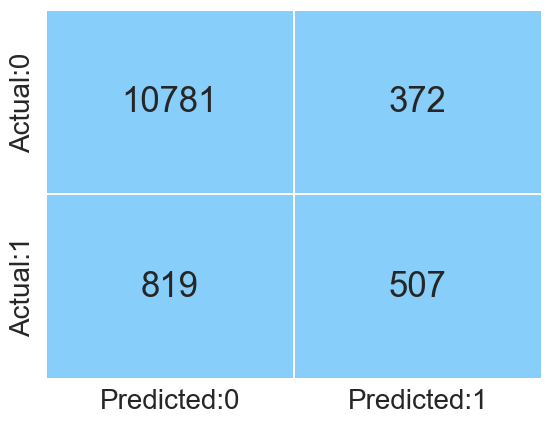

In [67]:
plot_confusion_matrix(log_with_SGD)

<h2 style="font-size:100%;"><b>Generating Test Report for SGD Logistic Regression:</b></h2>

In [68]:
test_report=get_test_report(log_with_SGD)

In [69]:
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11153
           1       0.58      0.38      0.46      1326

    accuracy                           0.90     12479
   macro avg       0.75      0.67      0.70     12479
weighted avg       0.89      0.90      0.90     12479



<h2 style="font-size:100%;"><b>Calculating kappa Value for SGD Logistic Regression:</b></h2>

In [70]:
kappa_value=kappa_score(log_with_SGD)
print(kappa_value)

0.40986945965284927


<h2 style="font-size:100%;"><b>ROC Curve for SGD Logistic Regression:</b></h2>

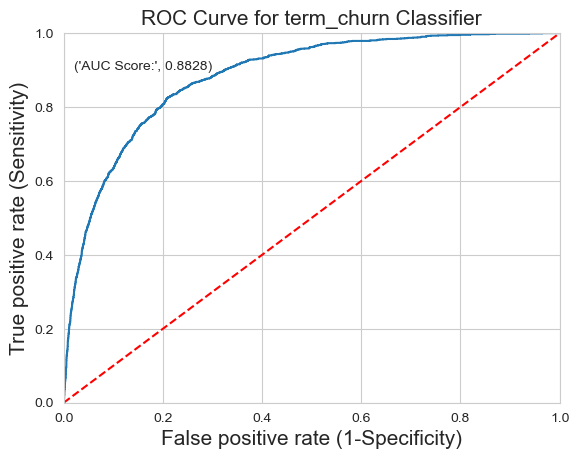

In [71]:
plot_roc(log_with_SGD)

<h2 style="font-size:100%;"><b>Updating Score Card for Logistic Regression with SGD:</b></h2>

In [72]:
update_score_card(model_name='Logistic Regression with SGD')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864


<h2 style="font-size:150%;"><b>Constructing Random Forest Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Importing Libraries for Random Forest Classifier Construction:</b></h2>

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

<h2 style="font-size:100%;"><b>Training Random Forest Classifier with 1000 Estimators:</b></h2>

In [74]:
rf_cls=RandomForestClassifier(n_estimators=1000,random_state=10)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

<h2 style="font-size:100%;"><b>Predictions using Random Forest Classifier:</b></h2>

In [75]:
y_pred=rf_cls.predict(x_test)

<h2 style="font-size:100%;"><b>Metrics for Random Forest Classifier with Optimized Parameters:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for Random Forest Classifier:</b></h2>

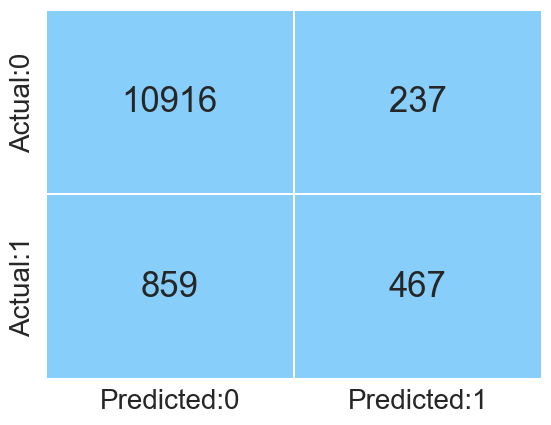

In [76]:
plot_confusion_matrix(rf_cls)

<h2 style="font-size:100%;"><b>Evaluating Test Report for Random Forest Classifier:</b></h2>

In [77]:
test_report=get_test_report(rf_cls)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11153
           1       0.66      0.35      0.46      1326

    accuracy                           0.91     12479
   macro avg       0.80      0.67      0.71     12479
weighted avg       0.90      0.91      0.90     12479



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Random Forest Classifier:</b></h2>

In [78]:
kappa_value=kappa_score(rf_cls)
print(kappa_value)

0.4171415723311662


<h2 style="font-size:100%;"><b>ROC Curve for Random Forest Classifier:</b></h2>

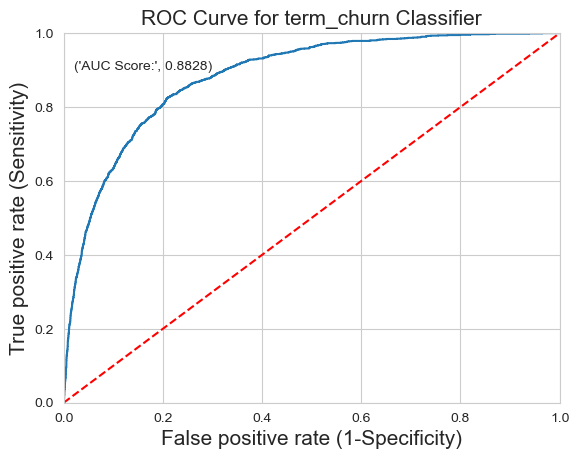

In [79]:
plot_roc(rf_cls)

<h2 style="font-size:100%;"><b>Updating Score Card for Random Forest Classifier:</b></h2>

In [80]:
update_score_card(model_name='Random Forest')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864
2,Random Forest,0.882849,0.663352,0.352187,0.912172,0.417142,0.460099


<h2 style="font-size:150%;"><b>Model Building with Random Forest Classifier and Hyperparameter Tuning:</b></h2>

<h2 style="font-size:100%;"><b>Defining Tuning Parameters for Random Forest Classifier:</b></h2>

In [81]:
tuned_parameters = [{
    'n_estimators': [150,200,250],
    'min_samples_split': [15, 25, 30],
    'max_depth': [8, 10, 15],
    'min_samples_leaf': [30,40,50],
    'max_leaf_nodes': [30,40,50]
}]

<h2 style="font-size:100%;"><b>Optimized Parameters for Random Forest Classifier:</b></h2>

In [82]:
rf_cls_CV=RandomForestClassifier(random_state=10)
grid=GridSearchCV(estimator=rf_cls_CV,param_grid=tuned_parameters,cv=10)
rf_grid=grid.fit(x_train,y_train)
print(rf_grid.best_params_, '\n')

{'max_depth': 8, 'max_leaf_nodes': 50, 'min_samples_leaf': 30, 'min_samples_split': 15, 'n_estimators': 150} 



<h2 style="font-size:100%;"><b>Training Random Forest Classifier with Optimized Parameters:</b></h2>

In [83]:
rf_grid_model=RandomForestClassifier(n_estimators=rf_grid.best_params_.get('n_estimators'),
                                    max_depth=rf_grid.best_params_.get('max_depth'),
                                    max_leaf_nodes=rf_grid.best_params_.get('max_leaf_nodes'),
                                    min_samples_leaf=rf_grid.best_params_.get('min_samples_leaf'),
                                    min_samples_split=rf_grid.best_params_.get('min_samples_split'),
                                    random_state=10)
rf_grid_model=rf_grid_model.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Generating Predictions using Random Forest Classifier with Optimized Parameters:</b></h2>

In [84]:
y_pred=rf_grid_model.predict(x_test)

<h2 style="font-size:100%;"><b>Confusion Matrix for Random Forest Classifier with Optimized Parameters:</b></h2>

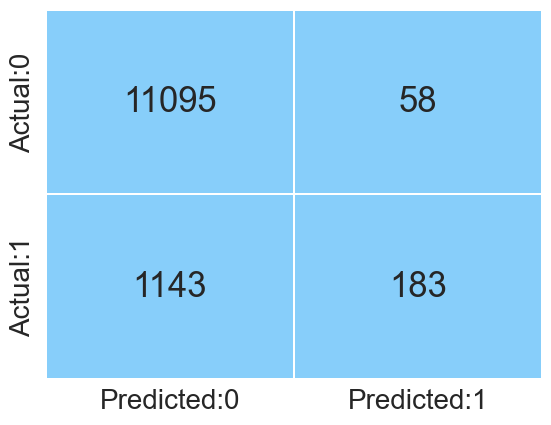

In [85]:
plot_confusion_matrix(rf_grid_model)

<h2 style="font-size:100%;"><b>Evaluating Test Report for Random Forest Classifier with Optimized Parameters:</b></h2>

In [86]:
test_report=get_test_report(rf_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11153
           1       0.76      0.14      0.23      1326

    accuracy                           0.90     12479
   macro avg       0.83      0.57      0.59     12479
weighted avg       0.89      0.90      0.87     12479



<h2 style="font-size:100%;"><b>Calculating Kappa value for Random Forest Classifier with Optimized Parameters:</b></h2>

In [87]:
kappa_value=kappa_score(rf_grid_model)
print(kappa_value)

0.20767043425481402


<h2 style="font-size:100%;"><b>ROC Curve for Random Forest Classifier with Optimized Parameters:</b></h2>

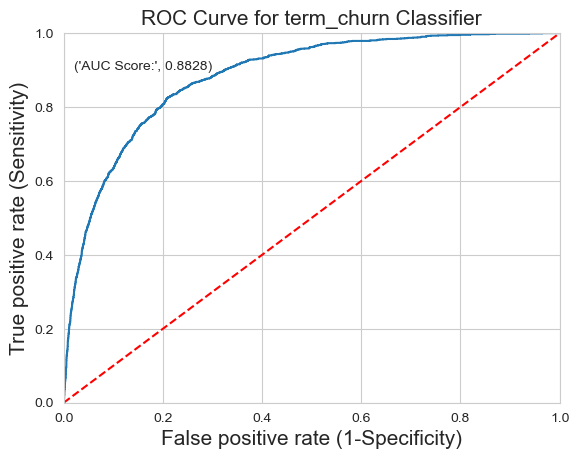

In [88]:
plot_roc(rf_grid_model)

<h2 style="font-size:100%;"><b>Updating Score Card for Random Forest Classifier with Tuned Parameters:</b></h2>

In [89]:
update_score_card(model_name='Random Forest with Tunned Parametres')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864
2,Random Forest,0.882849,0.663352,0.352187,0.912172,0.417142,0.460099
3,Random Forest with Tunned Parametres,0.882849,0.759336,0.138009,0.903758,0.207670,0.233567


<h2 style="font-size:150%;"><b>Constructing Decision Tree Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Importing Required Libraries for Decision Tree Classifier:</b></h2>

In [90]:
from sklearn.tree import DecisionTreeClassifier    
from sklearn.model_selection import GridSearchCV

<h2 style="font-size:100%;"><b>Training Decision Tree Classifier with Entropy Criterion:</b></h2>

In [91]:
#as of now we go with entropy as it is used commonly
decision_tree=DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_tree_model=decision_tree.fit(x_train,y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Decision Tree Classifier:</b></h2>

In [92]:
y_pred_pro = decision_tree_model.predict_proba(x_test)[:,1]
y_pred_pro

array([0., 0., 0., ..., 0., 0., 0.])

<h2 style="font-size:100%;"><b>Generating Predictions using Decision Tree Classifier:</b></h2>

In [93]:
y_pred = decision_tree_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<h2 style="font-size:150%;"><b>Performance Metrics for Decision Tree Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix for Decision Tree Classifier:</b></h2>

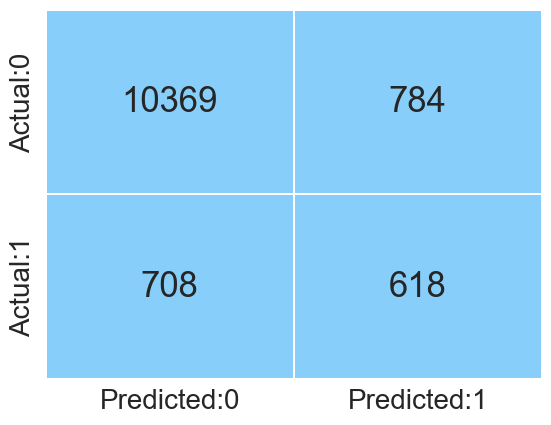

In [94]:
plot_confusion_matrix(decision_tree_model)

<h2 style="font-size:100%;"><b>Generating Test Report for Decision Tree Classifier:</b></h2>

In [95]:
test_report=get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     11153
           1       0.44      0.47      0.45      1326

    accuracy                           0.88     12479
   macro avg       0.69      0.70      0.69     12479
weighted avg       0.88      0.88      0.88     12479



<h2 style="font-size:100%;"><b>Calculating Kappa Value for Decision Tree Classifier:</b></h2>

In [96]:
kappa_value=kappa_score(decision_tree_model)
print(kappa_value)

0.38602114823710165


<h2 style="font-size:100%;"><b>ROC Curve for Decision Tree Classifier:</b></h2>

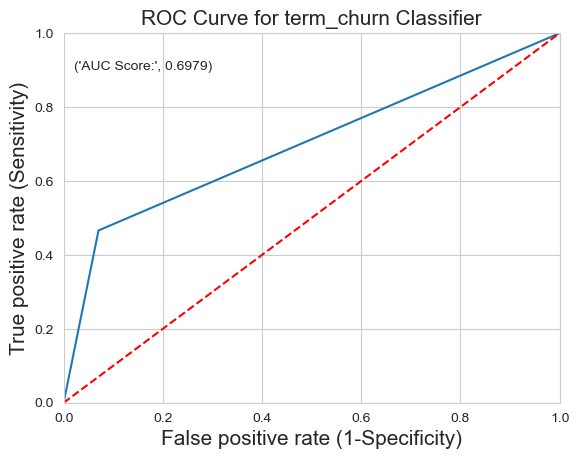

In [97]:
plot_roc(decision_tree_model)

<h2 style="font-size:100%;"><b>Updating Score Card for Decision Tree Classifier:</b></h2>

In [98]:
update_score_card(model_name='Decision Tree')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864
2,Random Forest,0.882849,0.663352,0.352187,0.912172,0.417142,0.460099
3,Random Forest with Tunned Parametres,0.882849,0.759336,0.138009,0.903758,0.207670,0.233567
4,Decision Tree,0.697884,0.440799,0.466063,0.880439,0.386021,0.453079


<h2 style="font-size:150%;"><b>Building Pruned Decision Tree Model:</b></h2>

In [99]:
prune = DecisionTreeClassifier(max_depth = 15, max_leaf_nodes = 40 , random_state = 10)
# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Pruned Decision Tree Classifier:</b></h2>

In [100]:
y_pred_pro = decision_tree_prune.predict_proba(x_test)[:,1]

<h2 style="font-size:100%;"><b>Generating Predictions using Pruned Decision Tree Classifier:</b></h2>

In [101]:
y_pred = decision_tree_prune.predict(x_test)

<h2 style="font-size:150%;"><b>Performance Metrics for Pruned Decision Tree Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Confusion Matrix Pruned Decision Tree Classifier:</b></h2>

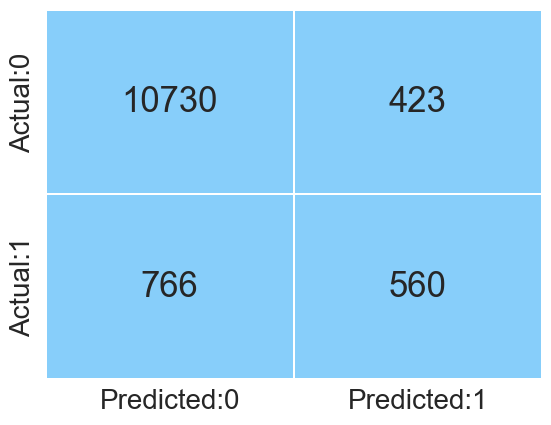

In [102]:
plot_confusion_matrix(decision_tree_prune)

<h2 style="font-size:100%;"><b>Test Report for Pruned Decision Tree:</b></h2>

In [103]:
test_report=get_test_report(decision_tree_prune)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11153
           1       0.57      0.42      0.49      1326

    accuracy                           0.90     12479
   macro avg       0.75      0.69      0.72     12479
weighted avg       0.89      0.90      0.90     12479



<h2 style="font-size:100%;"><b>Calculating Kappa Value for Pruned Decision Tree:</b></h2>

In [104]:
kappa_value=kappa_score(decision_tree_prune)
print(kappa_value)

0.4338353411547522


<h2 style="font-size:100%;"><b>ROC Curve for Pruned Decision Tree:</b></h2>

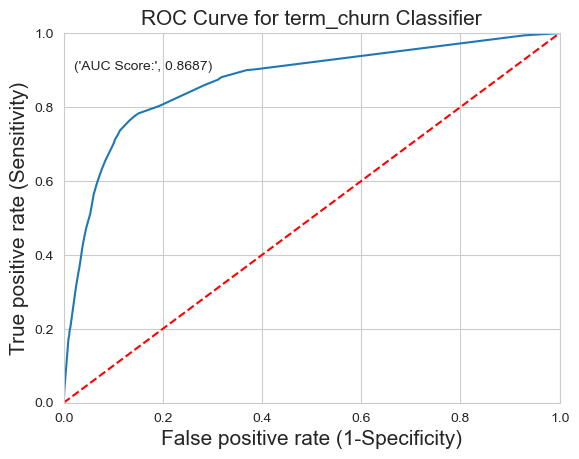

In [105]:
plot_roc(decision_tree_prune)

<h2 style="font-size:100%;"><b>Updating Score Card for Pruned Decision Tree:</b></h2>

In [106]:
update_score_card(model_name='Decision Tree (Pruned)')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864
2,Random Forest,0.882849,0.663352,0.352187,0.912172,0.417142,0.460099
3,Random Forest with Tunned Parametres,0.882849,0.759336,0.138009,0.903758,0.207670,0.233567
4,Decision Tree,0.697884,0.440799,0.466063,0.880439,0.386021,0.453079
5,Decision Tree (Pruned),0.868668,0.569685,0.422323,0.904720,0.433835,0.485058


<h2 style="font-size:150%;"><b>Building Decision Tree with Optimized Parameters:(Hyper Parametre Tuning):</b></h2>

<h2 style="font-size:100%;"><b>Defining Tuning Parameters for Decision Tree Classifier:</b></h2>

In [107]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [15, 25, 30],
                     'max_depth': [8,10,15],
                     'min_samples_leaf': [30,40,50],
                     'max_leaf_nodes': [30,40,50]}]

<h2 style="font-size:100%;"><b>Optimizing Decision Tree Classifier with Tuned Parameters:</b></h2>

In [109]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)
# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(x_train, y_train)
# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 40, 'min_samples_split': 15} 



<h2 style="font-size:100%;"><b>Training Decision Tree Classifier with Optimized Parameters:</b></h2>

In [110]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(x_train, y_train)

<h2 style="font-size:100%;"><b>Obtaining Predicted Probabilities from Optimized Decision Tree Classifier:</b></h2>

In [111]:
y_pred_pro = dt_grid_model.predict_proba(x_test)[:,1]

<h2 style="font-size:100%;"><b>Generating Predictions using Optimized Decision Tree Classifier:</b></h2>

In [112]:
y_pred = dt_grid_model.predict(x_test)

<h2 style="font-size:150%;"><b>Performance Metrics for Optimized Decision Tree Classifier:</b></h2>

<h2 style="font-size:100%;"><b>Confusion for Optimized Decision Tree Classifier:</b></h2>

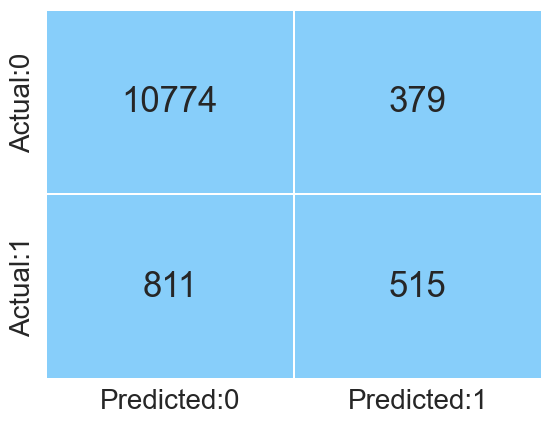

In [113]:
plot_confusion_matrix(dt_grid_model)

<h2 style="font-size:100%;"><b>Generating Test Report for Optimized Decision Tree Classifier:</b></h2>

In [114]:
test_report=get_test_report(dt_grid_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11153
           1       0.58      0.39      0.46      1326

    accuracy                           0.90     12479
   macro avg       0.75      0.68      0.71     12479
weighted avg       0.89      0.90      0.90     12479



<h2 style="font-size:100%;"><b>Calculating Kappa Score for Optimized Decision Tree Classifier:</b></h2>

In [115]:
kappa_value=kappa_score(dt_grid_model)
print(kappa_value)

0.4137959265910357


<h2 style="font-size:100%;"><b>ROC Curve for Optimized Decision Tree Classifier:</b></h2>

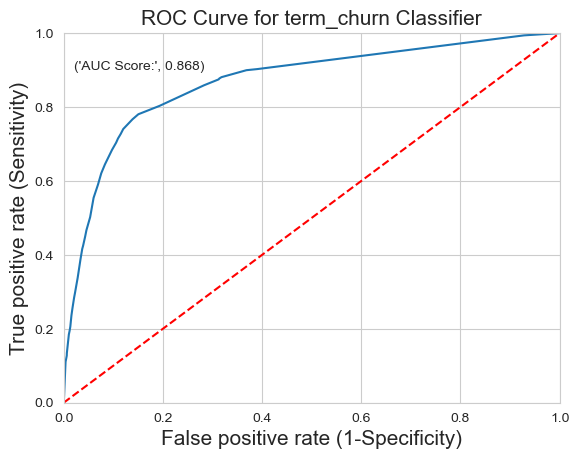

In [116]:
plot_roc(dt_grid_model)

<h2 style="font-size:100%;"><b>Updating Score Card for All Models:</b></h2>

In [117]:
update_score_card(model_name='Decision Tree (GridSearchCV)')

,Model,Auc Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.883545,0.615051,0.320513,0.906483,0.375986,0.421418
1,Logistic Regression with SGD,0.882849,0.576792,0.382353,0.904560,0.409869,0.459864
2,Random Forest,0.882849,0.663352,0.352187,0.912172,0.417142,0.460099
3,Random Forest with Tunned Parametres,0.882849,0.759336,0.138009,0.903758,0.207670,0.233567
4,Decision Tree,0.697884,0.440799,0.466063,0.880439,0.386021,0.453079
5,Decision Tree (Pruned),0.868668,0.569685,0.422323,0.904720,0.433835,0.485058
6,Decision Tree (GridSearchCV),0.867954,0.576063,0.388386,0.904640,0.413796,0.463964


<h2 style="font-size:200%;"><b>Conclusion and Recommendations:</b></h2>

Upon analyzing the results of our models building, a notable trend emerged across all models: there was a significant disparity in performance metrics between class 0 and class 1 predictions. Specifically, class 1 (term deposit churn) consistently exhibited lower precision, recall, and F1-score values compared to class 0 (no churn), resulting in an overall impact on the models' performance.

To address this imbalance and enhance the predictive capability of our models, we recommend implementing the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a method used to rebalance imbalanced datasets by generating synthetic samples for the minority class (class 1, in our case) to achieve a more equitable representation of both classes.

In simple terms, SMOTE helps our models by creating more examples of the minority class so they can learn from a more balanced dataset. This can lead to improved precision, recall, and F1-score for both classes, ultimately enhancing the overall performance of the models.

Comparing all models, it appears that Random Forest and the Pruned Decision Tree models show promise in delivering better results. By incorporating SMOTE into the training process, we anticipate further improvements in performance metrics across all models, particularly in achieving a better balance between predicting both churn and non-churn instances accurately. Therefore, SMOTE integration is a crucial step to consider for enhancing the effectiveness of our predictive models in real-world applications.